Task 1 By: Syed Muhammad Naqi Raza Rizvi


In [29]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [30]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


lets find relationship between the data by plotting:


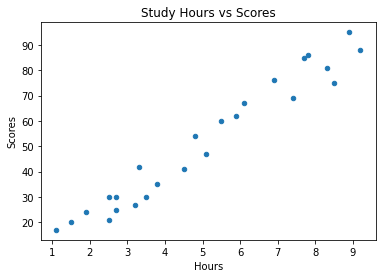

In [31]:
data.plot(x='Hours',y='Scores',kind='scatter',title='Study Hours vs Scores')

plt.show()

we can see positive linear relationship


 divide the data into attributes and labels
 

In [32]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

now split this data into training and testing. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

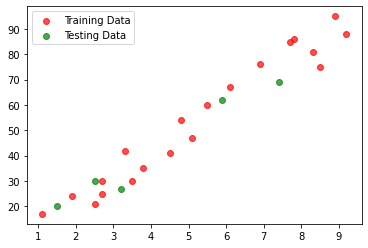

In [34]:
plt.scatter(X_train,y_train,label='Training Data',alpha=0.7 ,color='r')
plt.scatter(X_test,y_test,label='Testing Data',alpha=0.7,color='g')
plt.legend()
plt.show()

In [35]:
#Train the model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


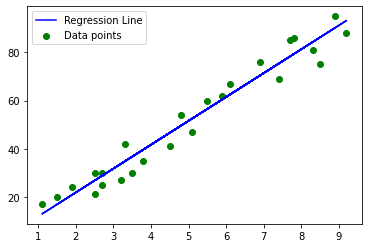

In [36]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='g',label='Data points')
plt.plot(X, line,color='b',label='Regression Line');
plt.legend()
plt.show()


Now that we have trained our algorithm, it's time to make some predictions.

In [37]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
# You can also test with your own data
no_of_hours=np.array(9.25)
score=regressor.predict(no_of_hours.reshape(-1,1))
print('No Of Hours: ',no_of_hours)
print('Expected Score : ',score)

No Of Hours:  9.25
Expected Score :  [93.69173249]


In [40]:
#Score Of The Model
goodness=regressor.score(X_test.reshape(-1,1),y_test)
goodness 

0.9454906892105354